#Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Exploratory Data Analysis

Load the dataset and explain the structure, attributes, and their significance.

Analyze missing data, descriptive statistics, and data distributions.

Create visualizations like time-series plots, histograms, and correlations.

In [6]:
# Load the dataset
file_path = 'Water-Quality-in-Fishpond-Data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79636 entries, 0 to 79635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_date  79636 non-null  object 
 1   water_pH      79636 non-null  float64
 2   TDS           79636 non-null  float64
 3   water_temp    79636 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.4+ MB


(None,
           created_date  water_pH         TDS  water_temp
 0  2023-01-26 10:38:00  7.940000  329.000000   23.690000
 1  2023-01-26 10:39:00  5.980000  233.000000   23.750000
 2  2023-01-26 10:40:00  7.430000  233.000000   23.750000
 3  2023-01-26 10:41:00  7.433864  233.386364   23.755682
 4  2023-01-26 10:42:00  7.437727  233.772727   23.761364)

1. Display Basic Information

What it does:

This calculates and displays summary statistics for each numerical column in the data DataFrame.

Includes:

Count: Number of non-missing values.

Mean: Average of the values.

Standard Deviation (std): Measure of variability or dispersion.

Min: Minimum value.

25%, 50%, 75%: Percentiles (25th, 50th [median], and 75th).

Max: Maximum value.

Why it's useful:

Quickly summarizes the data distribution.
Helps spot issues, like outliers or unexpected ranges of values.


2. Check for Missing Values
What it does:

.isnull() checks each value in the DataFrame for NaN (missing values).
.sum() adds up the number of missing values in each column.
Output:

A count of missing values for each column.
Why it's useful:

Identifies missing data, which is critical for preprocessing (e.g., imputation, removal).

3. Visualize the Data

What it does:

Uses Seaborn's pairplot to create pairwise scatterplots for all numerical columns in the dataset.
Plots each feature (column) against every other feature in the DataFrame.
Displays a histogram or kernel density estimate (KDE) on the diagonal for each column.
Why it's useful:

Visualizes relationships (correlations, trends, clusters) between variables.
Helps detect patterns or outliers in the data.


           water_pH           TDS    water_temp
count  79636.000000  79636.000000  79636.000000
mean       7.915114    416.493571     24.375373
std        1.866974    151.233375      1.025479
min        5.510000    206.000000     21.630000
25%        6.220000    334.000000     23.639755
50%        7.600000    378.000000     24.440000
75%        9.250000    437.416943     25.039340
max       15.020000   1694.000000     27.190000
created_date    0
water_pH        0
TDS             0
water_temp      0
dtype: int64


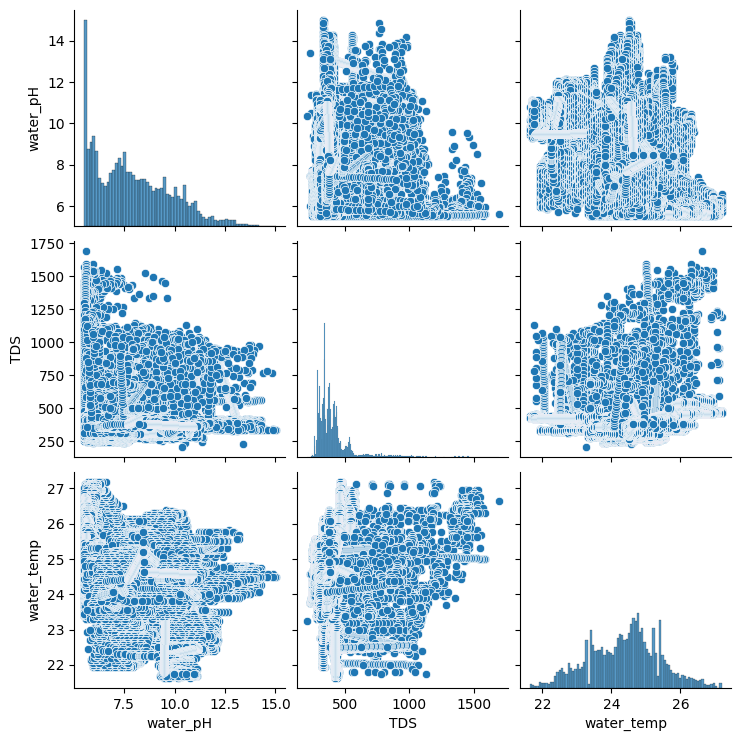

In [7]:
# Display basic information
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the data
sns.pairplot(data)
plt.show()

This code snippet creates a time-series visualization for three features—Water pH, TDS (Total Dissolved Solids), and Water Temperature—over time. It uses Matplotlib to generate line plots, providing insights into how these parameters change with time.

#Key Insights from Visualizations

Water pH:
Fluctuates significantly over time.
There are some spikes that may indicate anomalies or outliers.

TDS (Total Dissolved Solids):
Demonstrates periodic patterns with some sharp peaks and troughs.

Water Temperature:
Shows smaller fluctuations, suggesting relatively stable temperature trends.

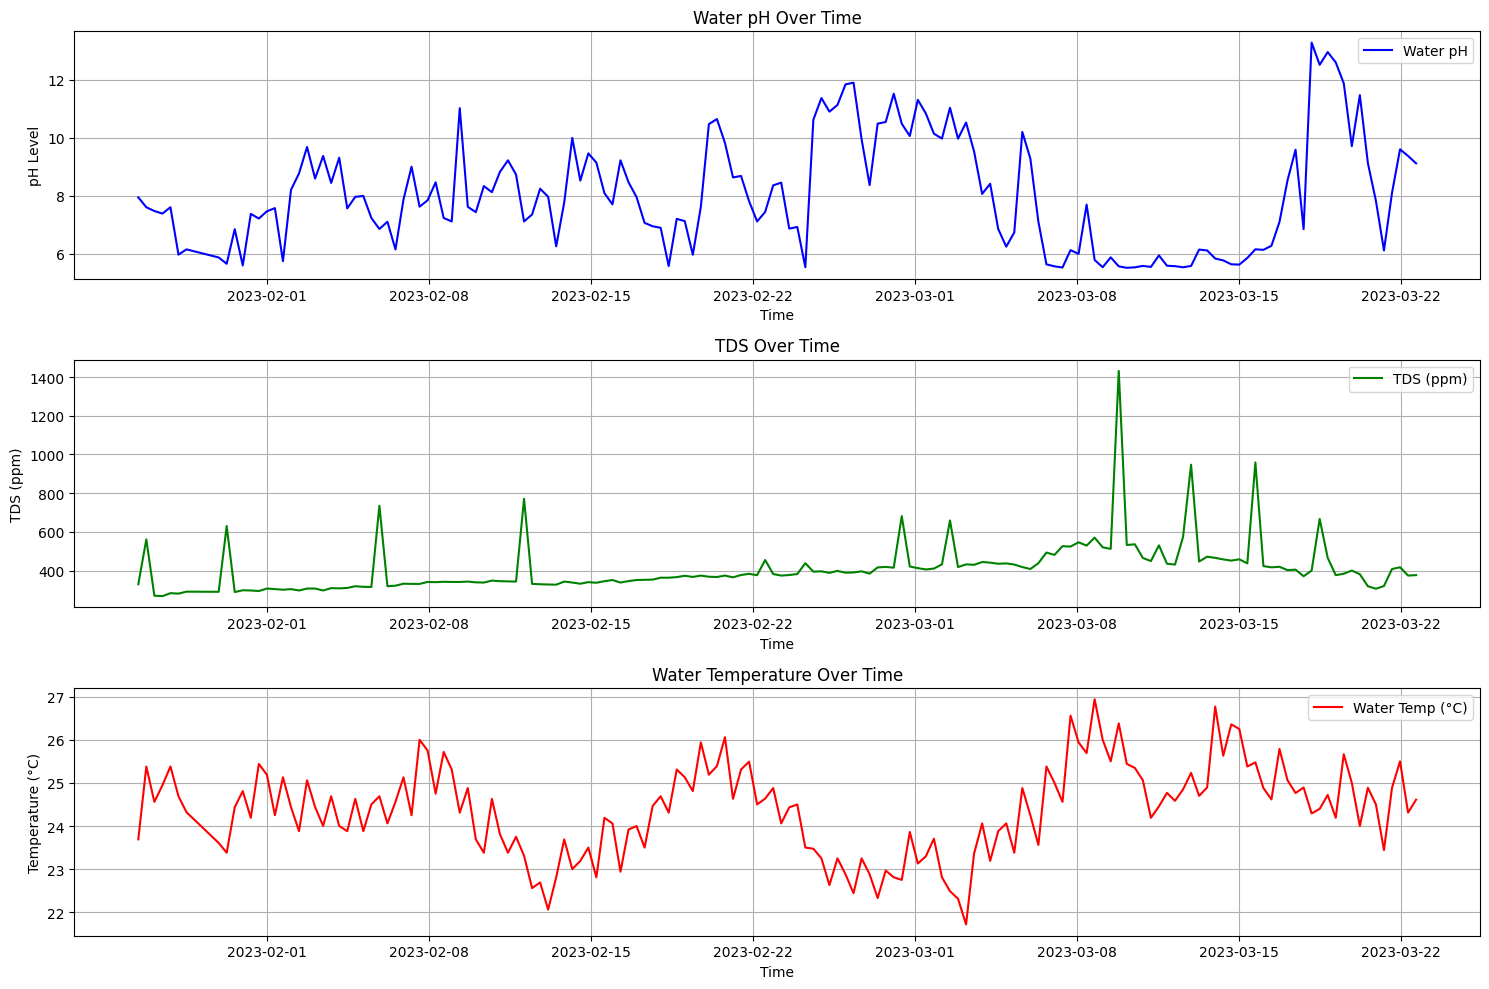

In [8]:
import matplotlib.pyplot as plt

# Convert 'created_date' to datetime format for time-series analysis
data['created_date'] = pd.to_datetime(data['created_date'])

# Plot water_pH, TDS, and water_temp over time (sample every 500th point for readability)
sampled_data = data.iloc[::500, :]

plt.figure(figsize=(15, 10))

# Water pH
plt.subplot(3, 1, 1)
plt.plot(sampled_data['created_date'], sampled_data['water_pH'], label='Water pH', color='blue')
plt.title('Water pH Over Time')
plt.xlabel('Time')
plt.ylabel('pH Level')
plt.grid()
plt.legend()

# TDS
plt.subplot(3, 1, 2)
plt.plot(sampled_data['created_date'], sampled_data['TDS'], label='TDS (ppm)', color='green')
plt.title('TDS Over Time')
plt.xlabel('Time')
plt.ylabel('TDS (ppm)')
plt.grid()
plt.legend()

# Water Temperature
plt.subplot(3, 1, 3)
plt.plot(sampled_data['created_date'], sampled_data['water_temp'], label='Water Temp (°C)', color='red')
plt.title('Water Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Importing Libraries For Training Model

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, GRU, Flatten, InputLayer

#Showing first and 500th sample input

In [38]:
# Load the data
def read_csv_pandas(file_path):
    data = pd.read_csv(file_path)
    return data

file_path = '/content/Water-Quality-in-Fishpond-Data.csv'
df = read_csv_pandas(file_path)

# Normalize the data
scaler = MinMaxScaler()
target_scaler = MinMaxScaler()  # Separate scaler for target variables
normalized_data = scaler.fit_transform(df[['water_pH', 'TDS', 'water_temp']])

# Sliding window function
def sliding_window(data, seq_length, pred_length):
    x, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length:(i + seq_length + pred_length)]
        x.append(_x)
        y.append(_y)
    return np.array(x), np.array(y)

# Define sequence length and prediction length
seq_length = 30  # Previous 30 minutes
pred_length = 3  # Predict 3 minutes into the future

# Apply sliding window on normalized data
x, y = sliding_window(normalized_data, seq_length, pred_length)

# Reshape target (y) and scale it
y_shape = y.shape
y = y.reshape(-1, y.shape[-1])  # Flatten for scaling
y = target_scaler.fit_transform(y)  # Normalize target data
y = y.reshape(y_shape)  # Reshape back

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for model input
X_train1 = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2]))
X_test1 = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Print first and 500th sample (if available)
print("Training Data:")
if len(x_train) > 0:
    print("First sample input (features):", x_train[0])
    print("First sample output (label):", y_train[0])
if len(x_train) > 500:
    print("500th sample input (features):", x_train[500])
    print("500th sample output (label):", y_train[500])
else:
    print("Not enough samples in training data to show 500th sample.")

print("\nTesting Data:")

if len(x_test) > 0:
    print("First sample input (features):", x_test[0])
    print("First sample output (label):", y_test[0])
if len(x_test) > 500:
    print("500th sample input (features):", x_test[500])
    print("500th sample output (label):", y_test[500])
else:
    print("Not enough samples in testing data to show 500th sample.")

Training Data:
First sample input (features): [[0.64293225 0.13056836 0.29136691]
 [0.65960643 0.13095238 0.29136691]
 [0.67628061 0.13133641 0.29136691]
 [0.69295478 0.13172043 0.29136691]
 [0.67258149 0.1312164  0.29136691]
 [0.6522082  0.13071237 0.29136691]
 [0.63183491 0.13020833 0.29136691]
 [0.61146162 0.1297043  0.29136691]
 [0.59108833 0.12920027 0.29136691]
 [0.57071504 0.12869624 0.29136691]
 [0.55034175 0.1281922  0.29136691]
 [0.52996845 0.12768817 0.29136691]
 [0.69190326 0.13172043 0.29136691]
 [0.56361725 0.12163978 0.29136691]
 [0.54153523 0.49663978 0.29136691]
 [0.55835962 0.12163978 0.29136691]
 [0.58569926 0.12432796 0.29136691]
 [0.54679285 0.13373656 0.29136691]
 [0.54363828 0.12903226 0.29136691]
 [0.61777077 0.12735215 0.29136691]
 [0.69190326 0.12567204 0.29136691]
 [0.67066246 0.12634409 0.29136691]
 [0.64942166 0.12701613 0.29136691]
 [0.62818086 0.12768817 0.29136691]
 [0.60694006 0.12836022 0.29136691]
 [0.58569926 0.12903226 0.29136691]
 [0.61724501 0.124

# Model 1
Model 1: LSTM-Based Model
Architecture:

Input Layer: Accepts a sequence of shape (30, 1) where 30 represents the sequence length (time steps), and 1 is the single feature (e.g., water_pH).

LSTM Layer:
This layer uses 64 LSTM units.
LSTM (Long Short-Term Memory) is designed to capture long-term dependencies in sequential data by using gates (input, forget, and output gates) to regulate the flow of information.

Dense Layers:
The first dense layer has 32 neurons with a ReLU activation function, which helps in learning complex representations of the data.
The second dense layer has 8 neurons with a ReLU activation function for further feature abstraction.

Output Layer:
A Dense layer with 3 neurons (linear activation), where each neuron predicts a value for +1, +2, and +3 minutes into the future.
Purpose: This architecture focuses on leveraging LSTMs to model temporal dependencies and is suitable for time series forecasting tasks.



In [22]:
def build_model1(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(8, activation='relu'),
        Dense(pred_length * len(parameters), activation='linear')  # Predict all parameters
    ])
    return model

# Model 2
Model 2: Conv1D + LSTM Hybrid Model
Architecture:

Input Layer: Accepts sequences of shape (30, 1), similar to Model 1.
Conv1D Layer:
A 1D convolutional layer with 64 filters and a kernel size of 2. This layer captures local temporal patterns within the sequence.

MaxPooling1D:
A pooling layer with a pool size of 2 to reduce the dimensionality and computational load while retaining the most important features.

LSTM Layer:
Contains 64 LSTM units. The output from the convolutional and pooling layers is passed to this layer to model sequential dependencies.

Dense Layers:
Two fully connected layers: one with 8 neurons (ReLU activation) and another with 3 neurons (linear activation).

Output Layer:
Produces predictions for +1, +2, and +3 minutes into the future.
Purpose: Combining Conv1D and LSTM helps to learn both local patterns (Conv1D) and long-term dependencies (LSTM) in the sequence.

In [23]:
def build_model2(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv1D(64, kernel_size=2, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64),
        Dense(8, activation='relu'),
        Dense(pred_length * len(parameters), activation='linear')
    ])
    return model

# Model 3
Model 3: GRU-Based Model
Architecture:

Input Layer: Accepts sequences of shape (30, 1).
GRU Layer:
This layer uses 64 GRU (Gated Recurrent Unit) units.
GRU is a simpler alternative to LSTM that combines the forget and input gates into a single update gate, making it computationally efficient.

Dense Layers:
A dense layer with 8 neurons (ReLU activation) to reduce the dimensions and learn complex patterns.
The final dense layer has 3 neurons (linear activation), each predicting for a specific time horizon.

Output Layer:
Generates predictions for +1, +2, and +3 minutes into the future.
Purpose: GRU is chosen for its efficiency in training while still being effective in capturing sequential relationships in time-series data.

In [24]:
def build_model3(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        GRU(64),
        Dense(8, activation='relu'),
        Dense(pred_length * len(parameters), activation='linear')
    ])
    return model

# Model 4
Model 4: Conv1D-Based Model
Architecture:

Input Layer: Accepts sequences of shape (30, 1).
Conv1D Layer:
A convolutional layer with 64 filters and a kernel size of 2 to extract local temporal features from the sequence.

Flatten Layer:
The output of the Conv1D layer is flattened into a 1D vector, preparing it for dense layers.

Dense Layers:
The first dense layer has 64 neurons with ReLU activation to learn high-level features.
The second dense layer has 8 neurons (ReLU activation) for further abstraction.

Output Layer:
A Dense layer with 3 neurons (linear activation) for predicting values at +1, +2, and +3 minutes into the future.
Purpose: This architecture focuses solely on learning local temporal patterns from the sequence using convolutional layers.

In [25]:
def build_model4(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv1D(64, kernel_size=2, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(8, activation='relu'),
        Dense(pred_length * len(parameters), activation='linear')
    ])
    return model

# Comparison of Models

Model 1 (LSTM): Ideal for capturing long-term dependencies but can be computationally expensive.

Model 2 (Conv1D + LSTM): Combines local and long-term pattern detection, offering a balance between complexity and performance.

Model 3 (GRU): Efficient and lightweight, suitable for fast training while retaining good performance on sequential data.

Model 4 (Conv1D): Focuses on extracting local features quickly but lacks the ability to capture long-term dependencies.

# Which Model Fits Which Scenario?

LSTM-based models (Model 1 and Model 2): Best for tasks where capturing long-term trends in time-series data is critical.

GRU-based model (Model 3): Works well for scenarios where computational efficiency is a priority.

Conv1D-based model (Model 4): Effective for tasks where local patterns are more important than long-term dependencies.

This code evaluates the performance of different machine learning models for predicting water quality parameters at three future time horizons (+1 minute, +2 minutes, and +3 minutes). It computes Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for the predictions of each model and organizes the results into three tables. Let’s break it down step by step:

#Key Components
Inputs:

models: A list of trained models (e.g., model1, model2, model3, model4).
X_test1: Test input data used for prediction.
y_test: Ground truth (actual) values for the test data, including targets for +1, +2, and +3 minutes.
parameters: Names of the water quality parameters (e.g., ["water_pH", "TDS", "water_temperature"]).
model_names: A list of model names corresponding to the models (e.g., ["LSTM", "Conv1D+LSTM", "GRU", "Conv1D"]).
Outputs:

results_table1, results_table2, results_table3: Lists storing results for predictions at +1, +2, and +3 minutes, respectively.
df_table1, df_table2, df_table3: DataFrames summarizing MAE and RMSE for each parameter and model at each time horizon.

In [26]:
# Input shape for all models
input_shape = (seq_length, len(parameters))

# Initialize models
models = [build_model1(input_shape), build_model2(input_shape), build_model3(input_shape), build_model4(input_shape)]
model_names = ['model1', 'model2', 'model3', 'model4']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [27]:
for i, model in enumerate(models):
    print(f"Training {model_names[i]}...")
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    cp = ModelCheckpoint(f'{model_names[i]}.keras', save_best_only=True)
    model.fit(X_train1, y_train.reshape((y_train.shape[0], -1)), validation_split=0.2, epochs=10, callbacks=[cp])
    model.save(f'./{model_names[i]}.keras')

Training model1...
Epoch 1/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - loss: 0.0479 - root_mean_squared_error: 0.2097 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582
Epoch 2/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 3/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 4/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 5/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522
Epoch 6/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0523
Epoch 7/1

In [28]:
# Dictionary to store results for each time horizon
results_table = {horizon: [] for horizon in range(1, 4)}  # For +1, +2, and +3 minutes

for i, model in enumerate(models):
    print(f"Evaluating {model_names[i]}...")
    # Predict and reshape outputs
    predictions = model.predict(X_test1).reshape((X_test1.shape[0], pred_length, len(parameters)))

    for horizon in range(pred_length):  # Horizon 0 = +1 minute, 1 = +2 minutes, etc.
        for param_idx, param_name in enumerate(parameters):
            # Extract predictions and ground truth
            predicted_value = predictions[:, horizon, param_idx]
            ground_truth = y_test[:, horizon, param_idx]

            # Calculate MAE and RMSE
            mae = mean_absolute_error(ground_truth, predicted_value)
            rmse = np.sqrt(mean_squared_error(ground_truth, predicted_value))

            # Append results
            results_table[horizon + 1].append({
                'Parameter': param_name,
                'Model': model_names[i],
                'MAE': mae,
                'RMSE': rmse
            })

Evaluating model1...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Evaluating model2...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Evaluating model3...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Evaluating model4...
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
# Display results for each time horizon
for horizon in range(1, 4):
    df_results = pd.DataFrame(results_table[horizon])
    print(f"\nTable {horizon}: Evaluation for predicting +{horizon} minute(s) data in the future")
    print(df_results.pivot_table(index='Parameter', columns='Model', values=['MAE', 'RMSE'], aggfunc=np.mean))


Table 1: Evaluation for predicting +1 minute(s) data in the future
                 MAE                                    RMSE            \
Model         model1    model2    model3    model4    model1    model2   
Parameter                                                                
TDS         0.029773  0.033059  0.026917  0.032142  0.070568  0.074908   
water_pH    0.036589  0.036740  0.036046  0.035801  0.049767  0.050533   
water_temp  0.009702  0.006163  0.003367  0.004861  0.012265  0.009562   

                                
Model         model3    model4  
Parameter                       
TDS         0.071027  0.069640  
water_pH    0.049453  0.049270  
water_temp  0.005958  0.007975  

Table 2: Evaluation for predicting +2 minute(s) data in the future
                 MAE                                    RMSE            \
Model         model1    model2    model3    model4    model1    model2   
Parameter                                                                

<ipython-input-29-98ea36e1c7ba>:5: FutureWarning: The provided callable <function mean at 0x7e14a7000e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df_results.pivot_table(index='Parameter', columns='Model', values=['MAE', 'RMSE'], aggfunc=np.mean))
<ipython-input-29-98ea36e1c7ba>:5: FutureWarning: The provided callable <function mean at 0x7e14a7000e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df_results.pivot_table(index='Parameter', columns='Model', values=['MAE', 'RMSE'], aggfunc=np.mean))
<ipython-input-29-98ea36e1c7ba>:5: FutureWarning: The provided callable <function mean at 0x7e14a7000e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used direct

In [34]:
# Denormalize function to revert scaled predictions to original values
def denormalize(data, scaler, feature_index):
    """Reverts normalization for a single feature index."""
    dummy_data = np.zeros((data.shape[0], scaler.n_features_in_))  # Create dummy array for inverse transform
    dummy_data[:, feature_index] = data  # Insert the normalized feature values
    return scaler.inverse_transform(dummy_data)[:, feature_index]

# Modify evaluation to denormalize predictions
results_table = {horizon: [] for horizon in range(1, 4)}

for i, model in enumerate(models):
    print(f"Evaluating {model_names[i]}...")
    # Predict and reshape outputs
    predictions = model.predict(X_test1).reshape((X_test1.shape[0], pred_length, len(parameters)))

    for horizon in range(pred_length):  # Horizon 0 = +1 minute, 1 = +2 minutes, etc.
        for param_idx, param_name in enumerate(parameters):
            # Extract predictions and ground truth
            predicted_value = predictions[:, horizon, param_idx]
            ground_truth = y_test[:, horizon, param_idx]

            # Denormalize predictions and ground truth
            predicted_value_denorm = denormalize(predicted_value, scaler, param_idx)
            ground_truth_denorm = denormalize(ground_truth, scaler, param_idx)

            # Calculate MAE and RMSE
            mae = mean_absolute_error(ground_truth_denorm, predicted_value_denorm)
            rmse = np.sqrt(mean_squared_error(ground_truth_denorm, predicted_value_denorm))

            # Append results
            results_table[horizon + 1].append({
                'Parameter': param_name,
                'Model': model_names[i],
                'MAE': mae,
                'RMSE': rmse
            })

Evaluating model1...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Evaluating model2...
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Evaluating model3...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Evaluating model4...
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Generate Predictions

Ensure you store predictions from each model for the testing data (X_test1):

In [35]:
# Generate predictions and denormalize them for visualization
predictions_by_model = {}

for i, model in enumerate(models):
    print(f"Generating predictions for {model_names[i]}...")
    # Predict and reshape outputs
    predictions = model.predict(X_test1).reshape((X_test1.shape[0], pred_length, len(parameters)))

    # Denormalize predictions for all time horizons and parameters
    predictions_denorm = np.zeros_like(predictions)
    for param_idx in range(len(parameters)):
        for horizon in range(pred_length):
            predictions_denorm[:, horizon, param_idx] = denormalize(
                predictions[:, horizon, param_idx], scaler, param_idx
            )

    # Store predictions for each model
    predictions_by_model[model_names[i]] = predictions_denorm

Generating predictions for model1...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Generating predictions for model2...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Generating predictions for model3...
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Generating predictions for model4...
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#Visualize Data
You can use matplotlib or seaborn to create line plots for visual comparison.

Example: Comparison for a Single Feature (e.g., water_pH)

Visualizing predictions for LSTM Model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


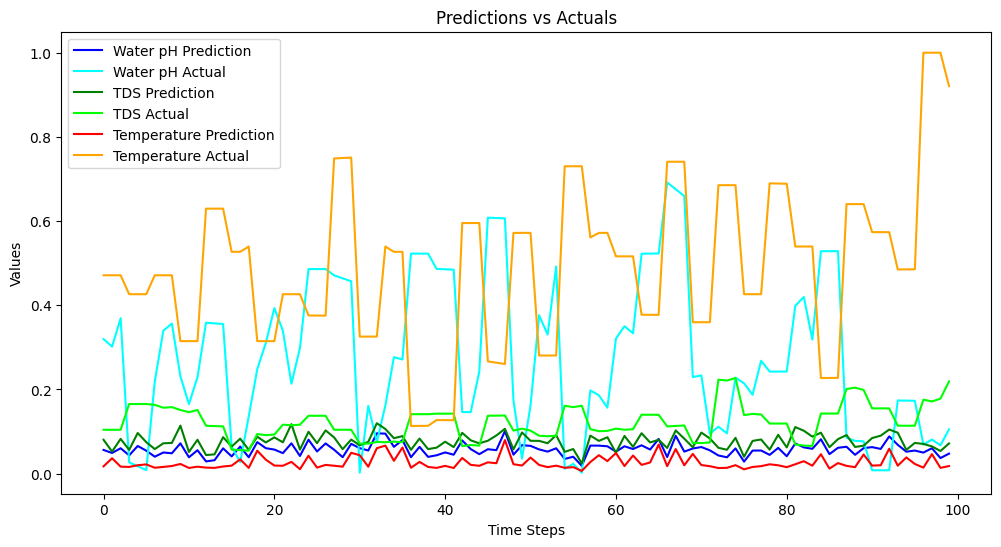

Visualizing predictions for Conv1D + LSTM Model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


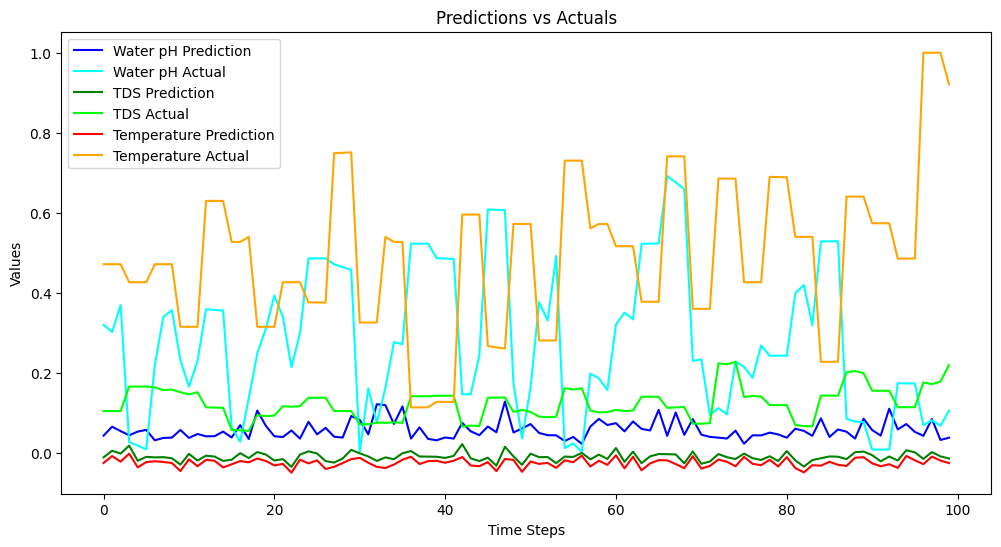

Visualizing predictions for GRU Model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


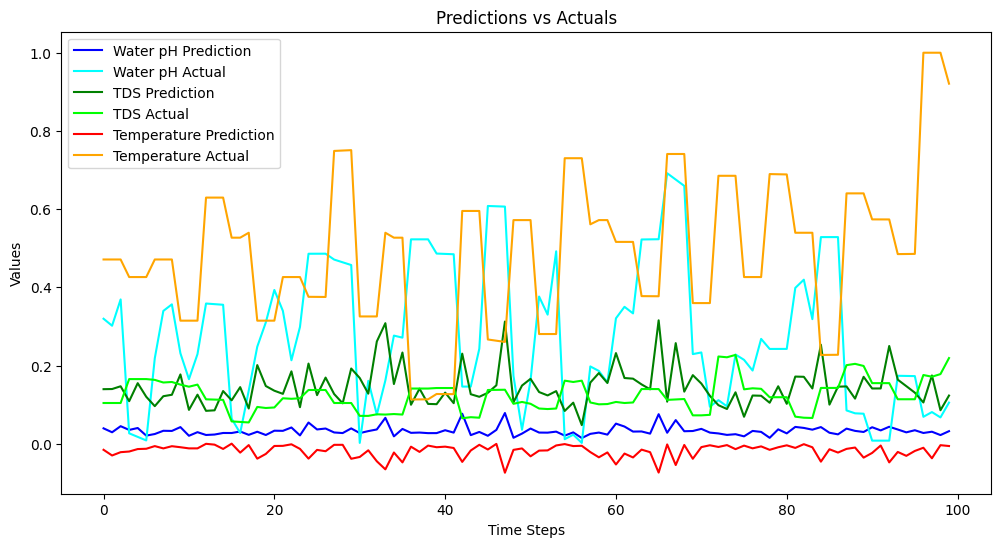

Visualizing predictions for Conv1D Model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


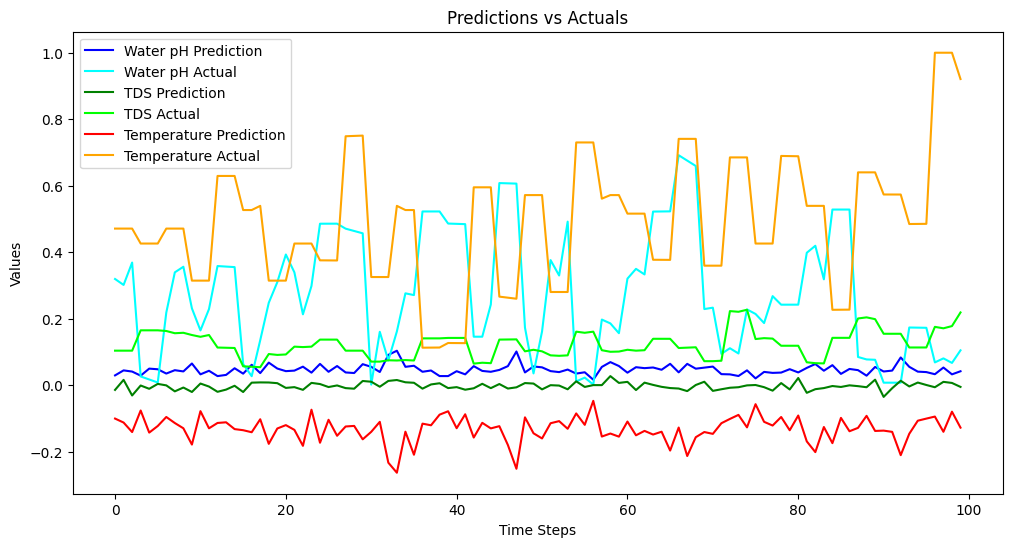

In [46]:
# Visualization function
def plot(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    predictions = predictions.reshape(-1, predictions.shape[-1])
    predictions = target_scaler.inverse_transform(predictions)

    y = y.reshape(-1, y.shape[-1])
    y = target_scaler.inverse_transform(y)

    ph_pred, tds_pred, temp_pred = predictions[:, 0], predictions[:, 1], predictions[:, 2]
    ph_true, tds_true, temp_true = y[:, 0], y[:, 1], y[:, 2]

    plt.figure(figsize=(12, 6))
    plt.plot(ph_pred[start:end], label='Water pH Prediction', color='blue')
    plt.plot(ph_true[start:end], label='Water pH Actual', color='cyan')
    plt.plot(tds_pred[start:end], label='TDS Prediction', color='green')
    plt.plot(tds_true[start:end], label='TDS Actual', color='lime')
    plt.plot(temp_pred[start:end], label='Temperature Prediction', color='red')
    plt.plot(temp_true[start:end], label='Temperature Actual', color='orange')
    plt.legend()
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.title('Predictions vs Actuals')
    plt.show()

# Plot for each model
for i, model in enumerate(models):
    print(f"Visualizing predictions for {model_names[i]}...")
    plot(model, X_test1, y_test, start=0, end=100)